## 1. Import

In [892]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [893]:
all_fights = pd.read_csv('ufc-master.csv')
all_fights

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,0,0,0.0000,0.00,0.0000,0.0000,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,172.72,175.26,125,0,6,0,4.4100,0.490,0.8000,2.6100,0.470,6,3,42,3,0,2,4,2,4,0,12,Orthodox,165.10,170.18,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.4100,-0.8000,-2.6100,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Welterweight,MALE,3,0,8,0,5.5000,0.55,0.3000,0.7700,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,190.50,187.96,170,0,6,0,4.1200,0.610,1.8000,1.4900,0.290,6,0,11,0,0,0,0,1,5,0,6,Orthodox,185.42,195.58,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.3800,-1.5000,-0.7200,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,0,4,0,5.1300,0.57,0.2000,0.4500,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,200.66,203.20,250,0,1,0,5.4900,0.600,0.5000,0.5800,0.210,7,2,33,3,0,0,3,4,2,0,9,Orthodox,193.04,205.74,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.3600,-0.3000,-0.1300,NaN,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,S-DEC,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Featherweight,MALE,3,2,0,0,3.7400,0.44,0.5000,0.4700,0.25,1,2,7,0,0,0,0,0,1,0,1,Southpaw,175.26,177.80,145,1,0,0,2.3000,0.580,1.6000,3.4500,0.410,6,2,22,0,1,0,5,0,1,0,7,Southpaw,177.80,177.80,145,30,36,1,0,-5,-6,0,-15,0,0,0,-2.54,0.00,6,1.4400,-1.1000,-2.9800,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,KO/TKO,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Doo

In [894]:
all_fights.shape

(6528, 118)

In [895]:
print(list(all_fights.columns))

['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 

In [896]:
all_fights.dtypes

RedFighter           object
BlueFighter          object
RedOdds             float64
BlueOdds            float64
RedExpectedValue    float64
                     ...   
BlueDecOdds         float64
RSubOdds            float64
BSubOdds            float64
RKOOdds             float64
BKOOdds             float64
Length: 118, dtype: object

In [897]:
all_fights.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6301.000000,6302.000000,6301.000000,6302.000000,6528.000000,6528.000000,6528.000000,6528.000000,5598.000000,5763.000000,5696.000000,5695.000000,5686.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6073.000000,6171.000000,6171.000000,6171.000000,6161.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,5042.000000,1200.000000,1779.000000,96.000000,9.0,146.000000,154.000000,186.000000,184.000000,182.000000,191.000000,184.000000,177.000000,181.000000,188.000000,253.000000,73.000000,1.0,100.000000,107.000000,148.000000,120.000000,137.000000,119.000000,120.000000,124.000000,119.000000,130.000000,67.000000,5906.000000,5906.000000,5441.000000,5412.000000,5192.000000,5169.000000,5194.000000,5168.000000
mean,-115.711474,59.793240,96.658224,165.054566,3.185509,0.501072,0.957567,0.023131,19.841810,0.453059,0.500202,1.320536,0.325419,1.923407,1.863664,11.872396,0.251685,0.017770,0.279871,1.093597,1.066330,0.626532,0.022212,3.145680,177.822068,182.162155,163.183977,0.622243,1.101562,0.031097,21.152766,0.460321,0.536907,1.399962,0.341467,2.679994,2.566789,17.408548,0.553462,0.026961,0.400888,1.612286,1.563879,0.934589,0.035539,4.628064,177.802399,182.410954,163.621324,30.359528,29.805607,0.059283,-0.143842,-0.756587,-1.482384,0.075061,-5.536152,-0.301777,-0.510876,-0.308058,-0.006679,-0.299271,0.096814,-2.663342,-0.071094,-0.171371,0.153114,8.339167,6.953345,7.291667,0.0,7.047945,7.097403,6.881720,7.119565,7.351648,7.130890,7.032609,6.983051,6.972376,6.590426,6.913043,8.410959,0.0,8.170000,8.476636,8.641892,8.483333,8.554745,8.386555,8.150000,7.967742,8.268908,8.407692,9.194030,2.424145,657.536234,308.333395,425.870288,884.048151,1100.497775,510.891606,636.463235
std,277.225783,253.117416,85.891109,137.689177,0.577441,0.794303,1.406786,0.156327,20.315307,0.110787,0.672859,1.356491,0.239174,1.949952,2.170130,13.845139,1.085122,0.133278,0.595123,1.613288,1.723951,1.258249,0.153494,3.712852

## 2. Data Preparation


In [898]:
# Locate duplicates
all_fights.loc[all_fights.duplicated()]

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds


In [899]:
all_fights.shape

(6528, 118)

In [900]:
# Creating separate dataframes: One for general analysis, and one for prediction modeling. Remove columns that won't be used in analysis/prediction.

analysis_df = all_fights[['RedFighter', 'BlueFighter', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
                          'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 
                          'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage', 'RedWins', 'RedStance', 
                          'RedHeightCms', 'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif',
                          'Finish', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs']
]
prediction_df = all_fights[['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 
                         'BlueExpectedValue', 
                         'Winner', 'TitleBout','NumberOfRounds',
                        'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 
                             'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 
                             'SigStrDif', 'AvgSubAttDif', 'AvgTDDif', 'BetterRank', 'Finish']]



In [901]:
# For colummns with null values, find ratio of null entries to total entries
def print_null_ratios(df):
    for col in df.columns:
        total_nulls = df[col].isnull().sum()
        ratio = total_nulls / df.shape[0]
        if total_nulls > 0:
            print(f"{col:<25} {total_nulls:<15} {ratio:<8.3f}")


In [902]:
# Number of null values in dataset of all fights
print(f"{'Column:':<25} {'Total Nulls:':<15} {'Ratio:':<8}")
print_null_ratios(analysis_df)


Column:                   Total Nulls:    Ratio:  
BlueStance                3               0.000   
Finish                    238             0.036   
FinishRound               622             0.095   
FinishRoundTime           622             0.095   
TotalFightTimeSecs        622             0.095   


In [903]:
# Number of null values in dataset of all fights
print(f"{'Column:':<25} {'Total Nulls:':<15} {'Ratio:':<8}")
print_null_ratios(prediction_df)

Column:                   Total Nulls:    Ratio:  
RedOdds                   227             0.035   
BlueOdds                  226             0.035   
RedExpectedValue          227             0.035   
BlueExpectedValue         226             0.035   
Finish                    238             0.036   


In [904]:
# Dropping Rows with Null Values
analysis_df = analysis_df.dropna()
prediction_df = prediction_df.dropna()
print(f"Analysis df shape after dropping nulls: {analysis_df.shape}")
print(f"Prediction df shape after dropping nulls: {prediction_df.shape}")

Analysis df shape after dropping nulls: (5905, 64)
Prediction df shape after dropping nulls: (6052, 26)


In [905]:
prediction_df['Winner'].unique()

array(['Red', 'Blue'], dtype=object)

In [906]:
# Looking at all the ways a fight could end
prediction_df['Finish'].unique()

array(['SUB', 'U-DEC', 'S-DEC', 'KO/TKO', 'M-DEC', 'DQ', 'Overturned'],
      dtype=object)

In [907]:
# Removing fights that ended in a Disqualification or were overturned then
# dropping method column
prediction_df = prediction_df[~all_fights['Finish'].isin(['DQ', 'Overturned'])]
prediction_df = prediction_df.drop(columns=['Finish'])

/var/folders/76/98xj4m9j2133gv8vv63lkhhh0000gn/T/ipykernel_26888/2035205986.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prediction_df = prediction_df[~all_fights['Finish'].isin(['DQ', 'Overturned'])]


In [908]:
# Convert Winner column to binary: 1 if Red, 0 otherwise
prediction_df['Winner = Blue'] = (prediction_df['Winner'] == 'Blue').astype(int)
prediction_df = prediction_df.drop(columns=['Winner']) 

In [909]:
prediction_df

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,TitleBout,NumberOfRounds,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BetterRank,Winner = Blue
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,True,5,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.4100,-0.8000,-2.6100,Red,0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,False,3,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.3800,-1.5000,-0.7200,Red,0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,False,3,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.3600,-0.3000,-0.1300,Red,0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,False,3,1,0,-5,-6,0,-15,0,0,0,-2.54,0.00,6,1.4400,-1.1000,-2.9800,Red,0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,False,3,0,0,0,-1,0,-2,0,3,-2,2.54,-5.08,-3,-1.8400,-0.2000,-0.2500,neither,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0,False,3,1,0,-2,-2,1,-5,0,-1,0,0.00,2.54,6,-13.6667,0.0000,0.0000,neither,1
6524,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0,False,3,0,-3,-3,-3,0,-9,0,-1,0,7.62,7.62,-2,-18.0000,-1.0000,-4.6667,neither,0
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0,False,3,0,0,0,0,0,0,-1,0,0,-2.54,-2.12,0,-4.0000,1.0000,1.0000,neither,0
6526,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0,False,3,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.5000,0.0000,-3.5000,neither,0


## 3. Exploratory Data Analysis

In [910]:
blue_win_percentage = (analysis_df['Winner'] == 'Blue').sum() / analysis_df.shape[0]
blue_title_win_percentage = ((analysis_df['TitleBout']) & (analysis_df['Winner'] == 'Blue')).sum() / analysis_df['TitleBout'].sum()

print(f"Total Fights: {analysis_df.shape[0]}")
print(f"Total Title Fights: {analysis_df['TitleBout'].sum()}")

print(f"Blue Win Percentage: {blue_win_percentage:.3f}")
print(f"Blue Win Percentage (Title Fights): {blue_title_win_percentage:.3f}")

Total Fights: 5905
Total Title Fights: 278
Blue Win Percentage: 0.420
Blue Win Percentage (Title Fights): 0.338


In [911]:
analysis_df

,RedFighter,BlueFighter,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,Finish,FinishRound,FinishRoundTime,TotalFightTimeSecs
0,Alexandre Pantoja,Kai Asakura,Red,True,Flyweight,MALE,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,172.72,175.26,125,0,6,0,6,3,42,3,0,2,4,2,4,0,12,Orthodox,165.10,170.18,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.4100,-0.8000,-2.6100,SUB,2.0,2:05,425.0
1,Shavkat Rakhmonov,Ian Machado Garry,Red,False,Welterweight,MALE,3,0,8,0,8,0,20,0,0,1,4,3,0,0,8,Orthodox,190.50,187.96,170,0,6,0,6,0,11,0,0,0,0,1,5,0,6,Orthodox,185.42,195.58,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.3800,-1.5000,-0.7200,U-DEC,5.0,5:00,1500.0
2,Ciryl Gane,Alexander Volkov,Red,False,Heavyweight,MALE,3,0,4,0,4,4,44,0,0,1,4,6,1,0,12,Orthodox,200.66,203.20,250,0,1,0,7,2,33,3,0,0,3,4,2,0,9,Orthodox,193.04,205.74,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.3600,-0.3000,-0.1300,S-DEC,3.0,5:00,900.0
3,Bryce Mitchell,Kron Gracie,Red,False,Featherweight,MALE,3,2,0,0,1,2,7,0,0,0,0,0,1,0,1,Southpaw,175.26,177.80,145,1,0,0,6,2,22,0,1,0,5,0,1,0,7,Southpaw,177.80,177.80,145,30,36,1,0,-5,-6,0,-15,0,0,0,-2.54,0.00,6,1.4400,-1.1000,-2.9800,KO/TKO,3.0,0:39,639.0
4,Nate Landwehr,Dooho Choi,Blue,False,Featherweight,MALE,3,0,1,1,3,3,15,0,0,0,0,4,0,0,4,Orthodox,177.80,177.80,145,0,1,0,3,3,17,0,1,0,1,1,2,0,5,Orthodox,175.26,182.88,145,36,33,0,0,0,-1,0,-2,0,3,-2,2.54,-5.08,-3,-1.8400,-0.2000,-0.2500,KO/TKO,3.0,3:21,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,Blue,False,Lightweight,MALE,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,177.80,180.34,145,1,0,0,2,1,5,0,0,0,1,1,0,0,2,Orthodox,177.80,177.80,170,31,25,1,0,-2,-2,1,-5,0,-1,0,0.00,2.54,6,-13.6667,0.0000,0.0000,KO/TKO,1.0,0:44,44.0
6524,John Howard,Daniel Roberts,Red,False,Welterweight,MALE,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Southpaw,177.80,187.96,170,0,3,0,3,0,9,0,0,2,0,1,0,0,3,Orthodox,170.18,180.34,170,27,29,0,-3,-3,-3,0,-9,0,-1,0,7.62,7.62,-2,-18.0000,-1.0000,-4.6667,KO/TKO,1.0,2:01,121.0
6525,Brendan Schaub,Chase Gormley,Red,False,Heavyweight,MALE,3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,Orthodox,190.50,196.00,265,1,0,0,0,1,1,1,0,0,0,0,0,0,0,Orthodox,193.04,198.12,245,27,27,0,0,0,0,0,0,-1,0,0,-2.54,-2.12,0,-4.0000,1.0000,1.0000,KO/TKO,1.0,0:47,47.0
6526,Mike Pierce,Julio Paulino,Red,False,Welterweight,MALE,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,182.88,185.42,170,1,0,0,1,1,6,0,0,0,1,0,0,0,1,Orthodox,172.72,177.80,170,29,34,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.5000,0.0000,-3.5000,U-DEC,3.0,5:00,900.0


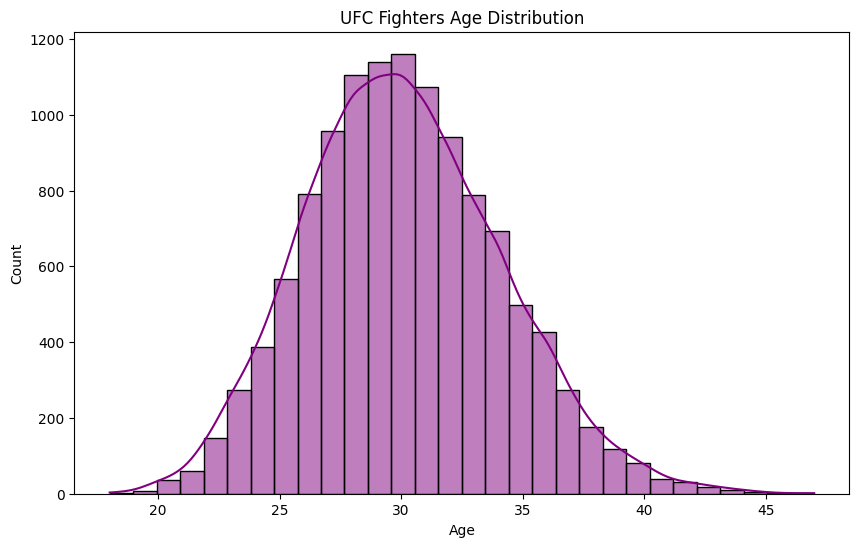

In [ ]:
# Combine red fighter's age and blue fighter's age into a single series for plotting
all_ages = pd.concat([analysis_df['RedAge'], analysis_df['BlueAge']], ignore_index=True)

# Plot the age distribution
plt.figure(figsize=(10,6))
sns.histplot(all_ages, bins=30, kde=True, color='purple')
plt.title('UFC Fighters Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Age Difference (Blue Age - Red Age)')

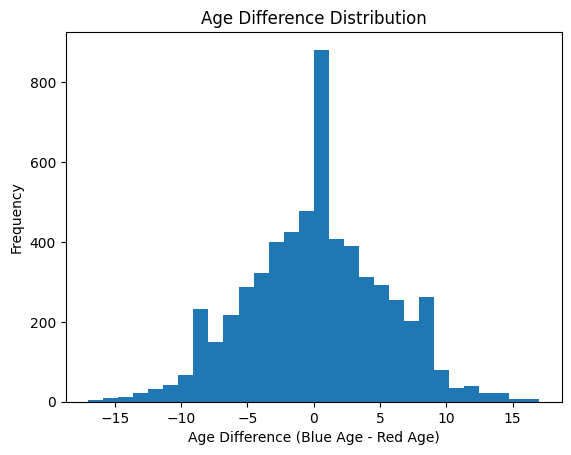

In [913]:
age_ax = analysis_df['AgeDif'].plot(kind='hist',
                                           bins=30,
                                           title='Age Difference Distribution')
age_ax.set_xlabel('Age Difference (Blue Age - Red Age)')

KeyError: 'Age Difference'

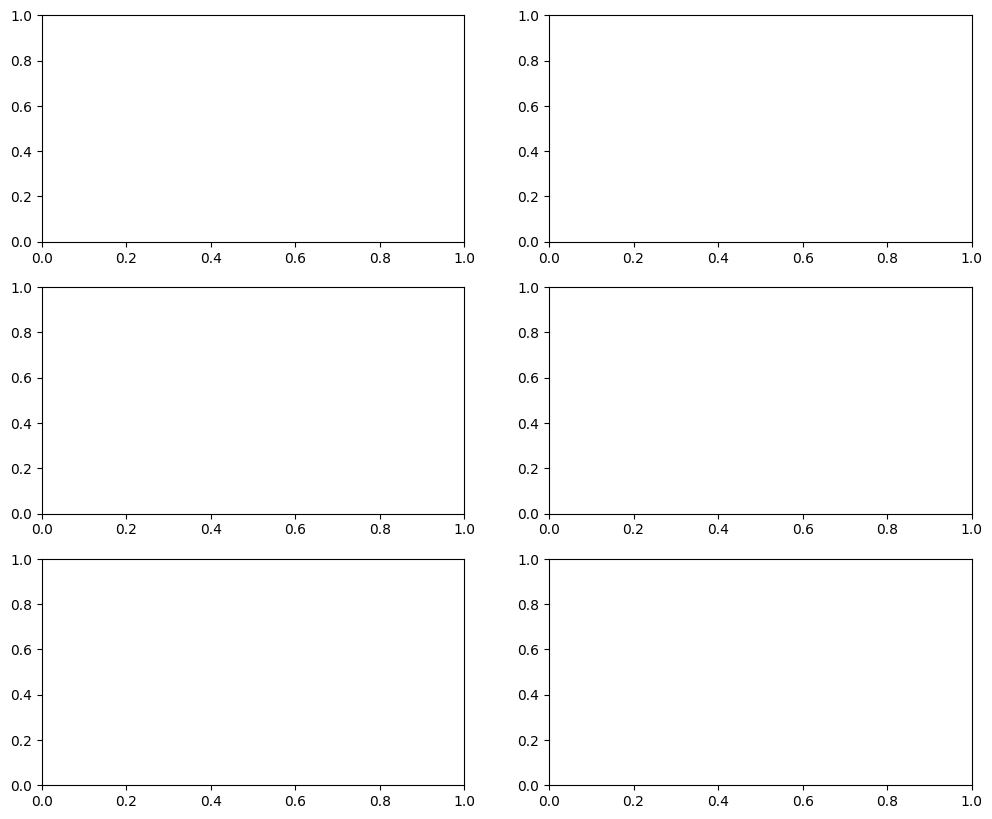

In [914]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# First plot
all_fights.groupby('Age Difference')['Winner = Red'].sum().plot(ax=axes[0, 0], kind='line', title='Red Wins by Age Difference')

# Second plot
all_fights.groupby('Height Difference (cm)')['Winner = Red'].sum().plot(ax=axes[0, 1], kind='line', title='Red Wins by Height Difference')

# Third plot
all_fights.groupby('Reach Difference (cm)')['Winner = Red'].sum().plot(ax=axes[1, 0], kind='line', title='Red Wins by Reach Difference')

# Fourth plot
all_fights.groupby('SLpM Diff')['Winner = Red'].sum().plot(ax=axes[1, 1], kind='line', title='Red Wins by SLpM Diff')

# Fifth plot
all_fights.groupby('TD Avg Diff')['Winner = Red'].sum().plot(ax=axes[2, 0], kind='line', title='Red Wins by TD Diff')

plt.tight_layout()
plt.show()

In [ ]:
correlations = all_fights.corr(numeric_only=True)
print(correlations['Winner = Red'].sort_values(ascending=False))

Winner = Red               1.000000
SLpM Diff                  0.199528
Sig Str Acc Diff           0.181302
TD Def Diff                0.164908
Str Def Diff               0.145253
wins_total_diff            0.143820
TD Avg Diff                0.106647
TD Acc Diff                0.083876
Is Title Bout              0.061657
Reach Difference (cm)      0.059511
weight_diff                0.059235
Height Difference (cm)     0.043317
Red Stance_Southpaw        0.029855
Blue Stance_Orthodox       0.019358
Sub Avg Diff               0.013124
Red Stance_Open Stance     0.009293
Blue Stance_Open Stance    0.006774
Red Stance_Switch         -0.000506
Blue Stance_Southpaw      -0.007120
Blue Stance_Switch        -0.024780
Red Stance_Orthodox       -0.028300
SApM Diff                 -0.138439
losses_total_diff         -0.147935
Age Difference            -0.181848
Name: Winner = Red, dtype: float64


In [ ]:

X = all_fights.drop(columns=['Winner = Red', 'Red Fighter', 'Blue Fighter'])
y = all_fights['Winner = Red']

model = RandomForestClassifier()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

SLpM Diff                  0.095209
wins_total_diff            0.092164
SApM Diff                  0.082197
losses_total_diff          0.076735
TD Def Diff                0.075934
TD Avg Diff                0.074800
Sig Str Acc Diff           0.071606
Age Difference             0.069615
TD Acc Diff                0.066952
Str Def Diff               0.065729
Sub Avg Diff               0.057849
Reach Difference (cm)      0.047497
Height Difference (cm)     0.043726
weight_diff                0.033635
Red Stance_Orthodox        0.008338
Red Stance_Southpaw        0.008216
Blue Stance_Orthodox       0.008180
Blue Stance_Southpaw       0.007916
Is Title Bout              0.005266
Blue Stance_Switch         0.004460
Red Stance_Switch          0.003651
Red Stance_Open Stance     0.000276
Blue Stance_Open Stance    0.000051
dtype: float64
